# My Clash Royale battles' EDA

## Queries

- Trophies over battles
- Difference of trophies between me and my opponents
  - Trophies difference over battles
  - Number of battles I had more trophies than my opponent
  - Number of battles I had less trophies than my opponent
  - Number of battles me and the opponent had the same trophies
  - Correlation between difference of trophies and crows won in each battle
  - Battle's result count based on diff of trophies
- Difference between my deck mean level and op's deck mean level
  - Cards mean lvl diff over time (battles, window = 5)
  - Cards mean lvl diff by result
- Opponents' elixir
  - Median deck elixir cost by arena
  - Opponents' elixir based on my battle result
- Exploring arenas
  - Number of battles played in each arena
- Stats by arena
  - Total battles in arena
  - Zooming in victories and defeats
    - Mine and opponents' card types (troops, buildings, spells, commons, rares and epics)
    - Opponents' cards median level
    - Top 20 opponents' cards

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import operator
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('../8V280L8VQ-clash-royale-da.csv', sep=',')

In [3]:
# Reversing dataframe order

df = df.sort_index(axis=0, ascending=False)
fixed_index = list(df.index)
fixed_index.sort()
df = df.set_index([fixed_index])

In [4]:
def arena(trophies):
    if trophies < 400:
        return '1'
    elif trophies < 800:
        return '2'
    elif trophies < 1100:
        return '3'
    elif trophies < 1400:
        return '4'
    elif trophies < 1700:
        return '5'
    elif trophies < 2000:
        return '6'
    elif trophies < 2300:
        return '7'
    elif trophies < 2600:
        return '8'
    elif trophies < 3000:
        return '9'
    elif trophies < 3400:
        return '10'
    elif trophies < 3800:
        return '11'
    else: 
        return '12'

In [5]:
df['arena'] = df['my_trophies'].apply(lambda row: arena(row))

In [6]:
pd.set_option('display.max_columns', None)  
df.describe()

,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Royal_Giant,op_Guards,op_Mirror,op_Graveyard,op_Barbarians,op_Prince,op_Executioner,op_P.E.K.K.A,op_Archers,op_Minions,op_Witch,op_X-Bow,op_Giant_Skeleton,op_Skeleton_Army,op_Wizard,op_Night_Witch,op_Miner,op_Mega_Knight,op_Goblin_Hut,op_Baby_Dragon,op_Hog_Rider,op_Clone,op_Goblin_Gang,op_Inferno_Tower,op_Tesla,op_Dark_Prince,op_Three_Musketeers,op_Musketeer,op_Goblin_Barrel,op_Valkyrie,op_Golem,op_Ice_Spirit,op_Bomb_Tower,op_Poison,op_Fireball,op_Furnace,op_Goblins,op_Ice_Wizard,op_Zap,op_Freeze,op_Mega_Minion,op_Balloon,op_Lumberjack,op_Barbarian_Hut,op_Minion_Horde,op_Dart_Goblin,op_Lightning,op_Skeletons,op_Electro_Wizard,op_Bomber,op_Inferno_Dragon,op_Elite_Barbarians,op_Tornado,op_Spear_Goblins,op_Ice_Golem,op_Sparky,op_The_Log,op_Hunter,op_Tombstone,op_Arrows,op_Rage,op_Lava_Hound,op_Elixir_Collector,op_Knight,op_Bandit,op_Fire_Spirits,op_Rocket,op_Battle_Ram,op_Bats,op_Mortar,op_Mini_P.E.K.K.A,op_Giant,op_Princess,op_Bowler,op_Skeleton_Barrel,op_Cannon,op_Royal_Ghost,my_Musketeer,my_Hog_Rider,my_Valkyrie,my_Witch,my_Wizard,my_Prince,my_Bomber,my_Inferno_Tower,my_Knight,my_Mini_P.E.K.K.A,my_Royal_Giant,my_Rage,my_Furnace,my_Fireball,my_Goblin_Barrel,my_Archers,my_Minions,my_Skeleton_Barrel,my_Mega_Knight,my_Cannon,my_Spear_Goblins,my_Balloon,my_Goblins,my_Giant,my_Mortar,my_Skeleton_Army,my_Baby_Dragon,my_Arrows,my_Fire_Spirits,my_Elite_Barbarians,my_Zap
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.359684,4.266798,1.407115,1636.598814,1636.638340,3.496294,3.986660,4.796443,0.752964,2.450593,5.920949,0.389328,1.689723,3.559289,1.729249,2.513834,0.197628,1.962451,2.381423,3.422925,0.233202,0.100791,0.009881,0.260870,0.031621,0.243083,0.883399,0.011858,0.250988,0.851779,0.650198,1.005929,0.075099,0.294466,1.393281,1.584980,0.001976,0.031621,0.001976,0.498024,1.023715,0.843874,0.055336,0.041502,0.252964,0.175889,0.023715,0.053360,1.118577,0.525692,1.634387,0.088933,0.041502,0.039526,0.102767,0.924901,0.092885,0.341897,0.029644,0.984190,0.071146,0.049407,0.579051,0.011858,0.132411,2.197628,0.001976,0.084980,0.094862,0.013834,0.786561,0.045455,0.191700,0.128458,1.134387,0.013834,0.015810,0.019763,0.003953,0.136364,2.136364,0.333992,0.025692,0.071146,1.132411,0.007905,0.397233,0.472332,0.079051,0.083004,0.033597,0.915020,0.628458,0.025692,0.005929,0.098814,0.069170,0.001976,0.387352,0.426877,0.027668,0.401186,0.005929,0.01

## Trophies over time (battles)

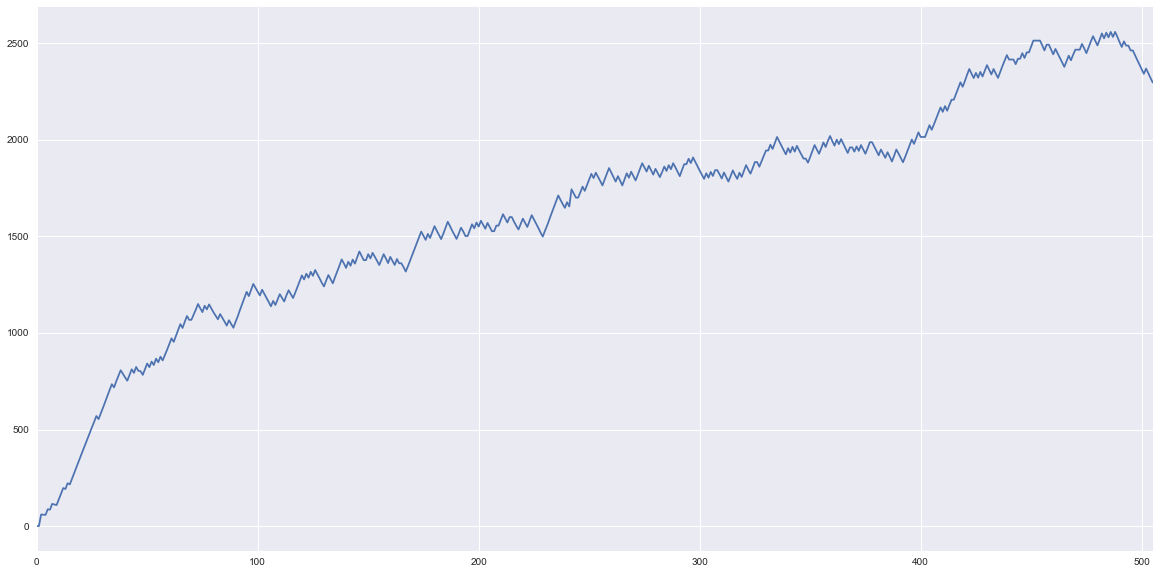

In [7]:
(df['my_trophies'].rolling(window = 1)
     .mean()
     .plot(figsize=(20, 10)))

## Difference of trophies between me and my opponents

In [8]:
df_diff_troph = df[['my_trophies', 'opponent_trophies']]

df_diff_troph = df_diff_troph.assign(troph_diff = df.my_trophies - df.opponent_trophies)

In [9]:
df_diff_troph['troph_diff'].describe()

count    506.000000
mean      -0.039526
std       50.731934
min      -86.000000
25%      -50.000000
50%        4.000000
75%       47.000000
max       87.000000
Name: troph_diff, dtype: float64

### Trophies difference over time (battles, window = 5)

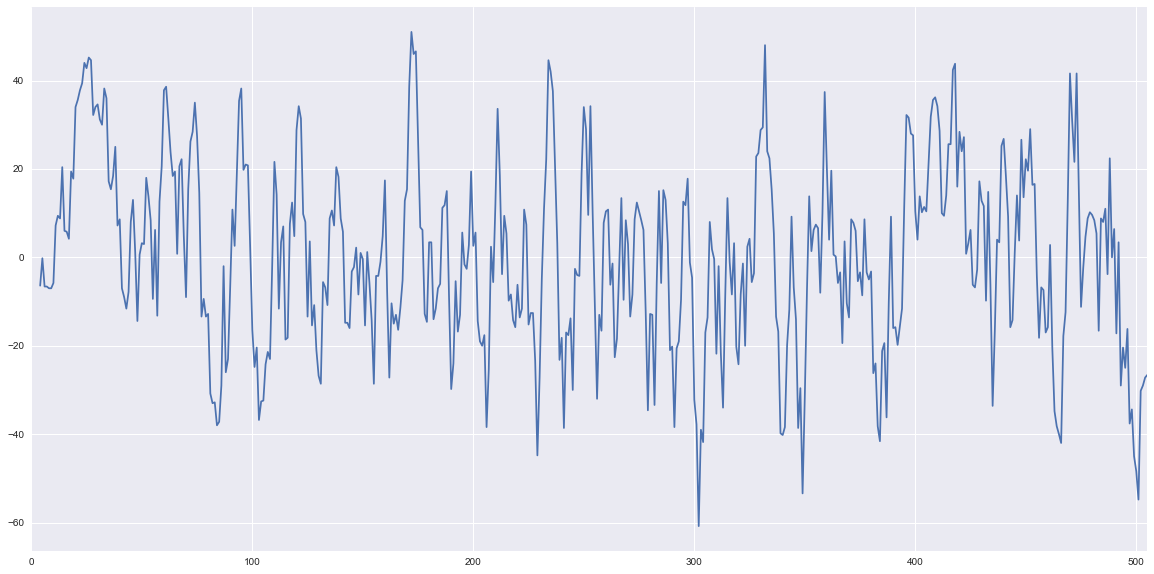

In [10]:
(df_diff_troph['troph_diff'].rolling(window = 5)
     .mean()
     .plot(figsize=(20, 10)))

### Trophies difference over time (battles, window = 20)

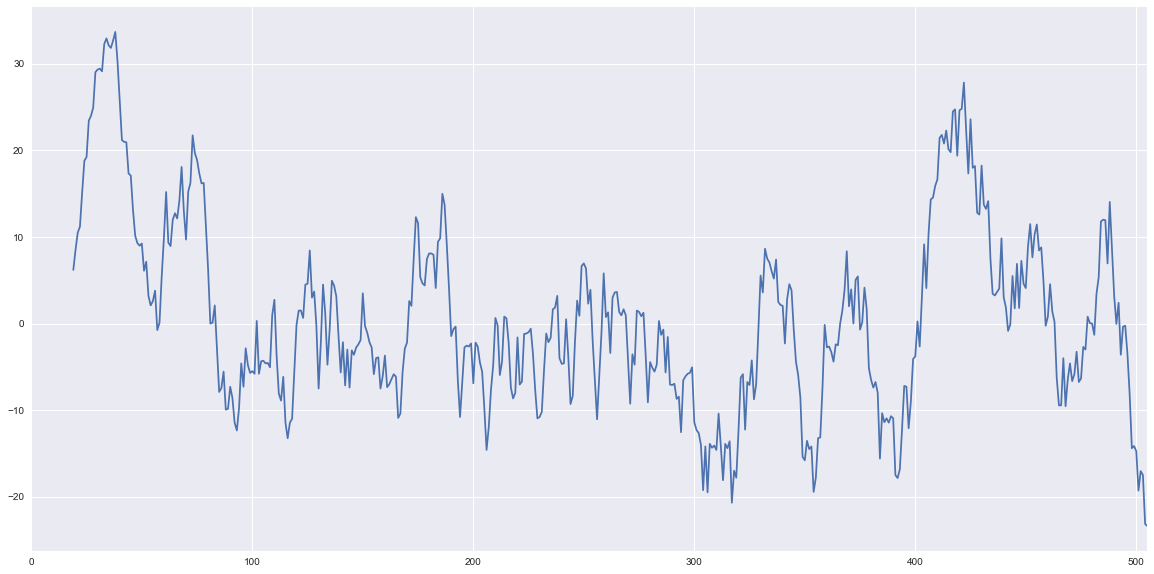

In [135]:
(df_diff_troph['troph_diff'].rolling(window = 20)
     .mean()
     .plot(figsize=(20, 10)))

### Number of battles I had more trophies than my opponent

In [11]:
df_diff_troph[df_diff_troph.troph_diff > 0]['troph_diff'].describe()

count    254.000000
mean      47.362205
std       16.287277
min        2.000000
25%       37.000000
50%       47.000000
75%       58.000000
max       87.000000
Name: troph_diff, dtype: float64

### Number of battles I had less trophies than my opponent

In [12]:
df_diff_troph[df_diff_troph.troph_diff < 0]['troph_diff'].describe()

count    248.000000
mean     -48.588710
std       17.697188
min      -86.000000
25%      -59.000000
50%      -51.000000
75%      -41.000000
max       -1.000000
Name: troph_diff, dtype: float64

### Number of battles me and the opponent had the same trophies

In [13]:
df_diff_troph[df_diff_troph.troph_diff == 0]['troph_diff'].describe()

count    4.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: troph_diff, dtype: float64

### Correlation between difference of trophies and crows won in each battle

,troph_diff,points
troph_diff,1.0000,0.9309
points,0.9309,1.0000


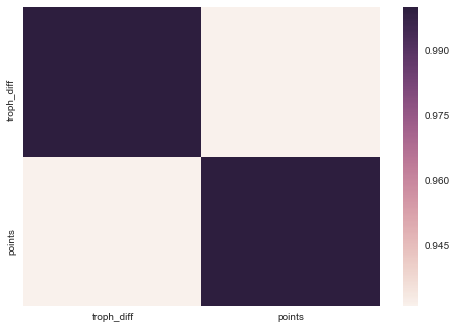

In [14]:
df['troph_diff'] = df_diff_troph['troph_diff']

corr = df[['troph_diff', 'points']].corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

corr

### Battles' result count based on diff of trophies

#### When I have more or the same number of trophies than my opponent

In [15]:
df[['troph_diff', 'my_result']][df.troph_diff >= 0].groupby(['my_result']).count()

,troph_diff
my_result,
Defeat,1
Draw,14
Victory,243


#### When I have less trophies than my opponent

In [16]:
df[['troph_diff', 'my_result']][df.troph_diff < 0].groupby(['my_result']).count()

,troph_diff
my_result,
Defeat,232
Draw,16


### Finding more linear correlations

In [84]:
def corrs(df, columns_list, plot_size=(50, 50), font_scale = 1.5):
    if columns_list == 0:
        corrs = df.corr().round(2)        
    else:
        corrs = df[columns_list].corr().round(2)
        
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask, k = 0)] = True        

    sns.set(rc={'figure.figsize': plot_size})

    sns.set(font_scale=font_scale)

    sns.heatmap(corrs, xticklabels=corrs.columns.values, yticklabels=corrs.columns.values, 
                annot=True, mask=mask)
    
    plt.show()        

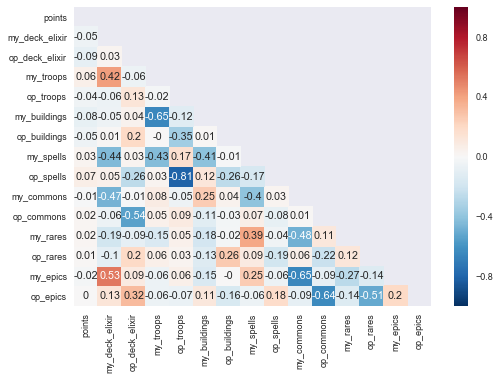

In [85]:
corrs(df, ['points', 'my_deck_elixir', 'op_deck_elixir', 'my_troops', 'op_troops', 
           'my_buildings', 'op_buildings', 'my_spells', 'op_spells', 
           'my_commons', 'op_commons', 'my_rares', 'op_rares', 'my_epics', 'op_epics'], font_scale = 0.9)

## Difference between my deck mean level and op's deck mean level

In [128]:
df_aux = df.filter(regex=('my_[A-Z]|op_[A-Z]'))

lvl_diff = []

for row in df_aux.itertuples(index=False):  
    my_lvls = []
    op_lvls = []
    
    for col in row._fields:        
        if not col.startswith('_'):
            if getattr(row, col) > 0:
                if re.match('my_[A-Z]', col):
                    my_lvls.append(getattr(row, col))
                else:
                    op_lvls.append(getattr(row, col))
    
    lvl_diff.append(np.mean(my_lvls) - np.mean(op_lvls))
    
df['cards_lvl_mean_diff'] = lvl_diff

In [122]:
df['cards_lvl_mean_diff'].describe()

count    506.000000
mean      -0.328677
std        0.969047
min       -3.035714
25%       -0.982143
50%       -0.339286
75%        0.250000
max        3.375000
Name: cards_lvl_mean_diff, dtype: float64

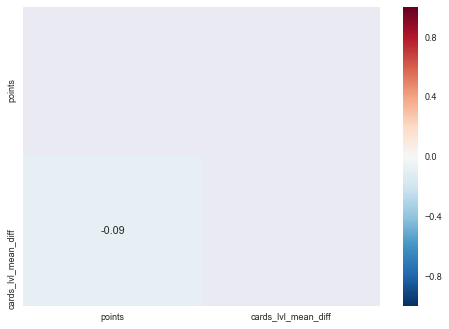

In [124]:
corrs(df, ['points', 'cards_lvl_mean_diff'], font_scale = 0.9)

### Cards mean lvl diff over time (battles, window = 5)

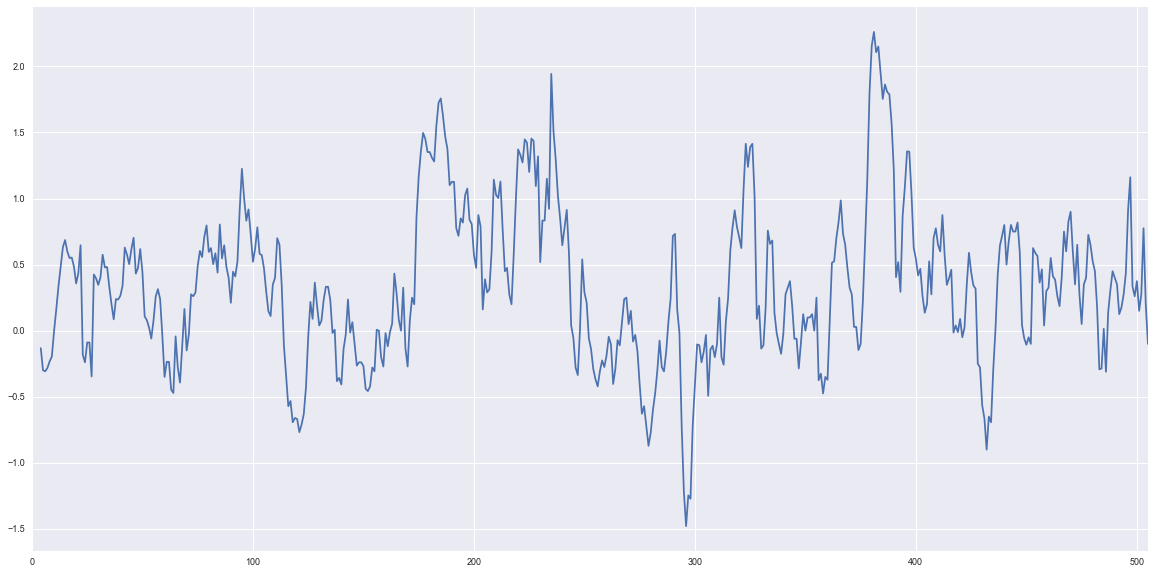

In [132]:
(df['cards_lvl_mean_diff'].rolling(window = 5)
     .mean()
     .plot(figsize=(20, 10)))

### Cards mean lvl diff over time (battles, window = 20)

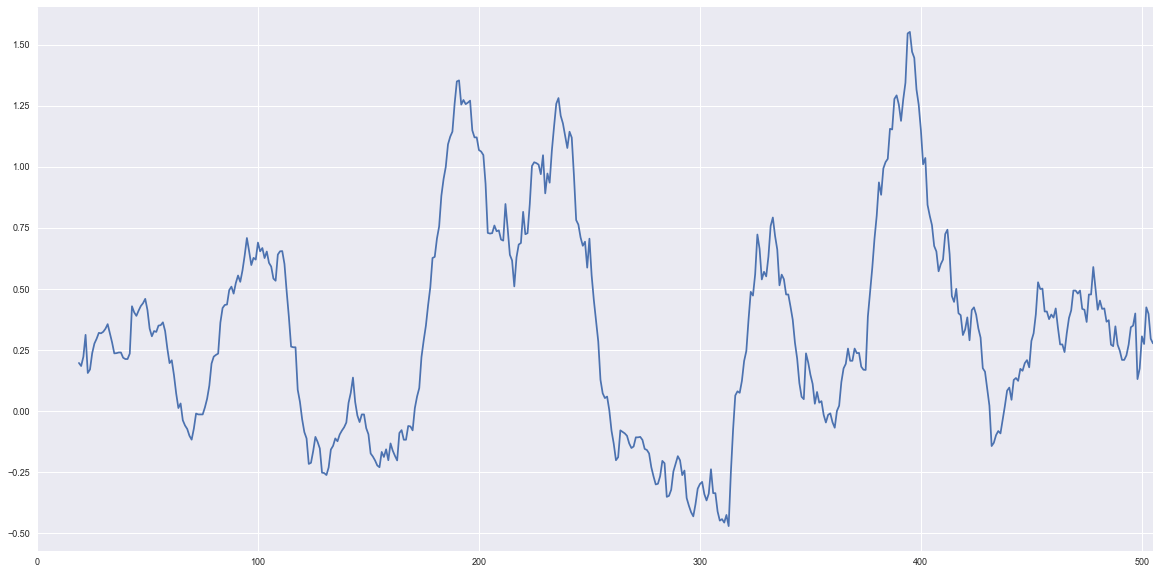

In [133]:
(df['cards_lvl_mean_diff'].rolling(window = 20)
     .mean()
     .plot(figsize=(20, 10)))

### Cards mean lvl diff by battle result

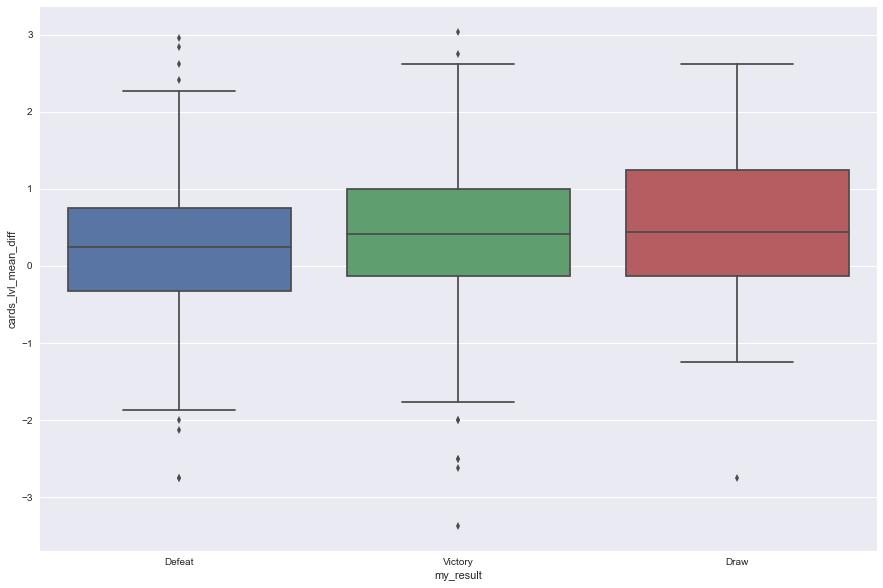

In [134]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(x=df['my_result'], y=df['cards_lvl_mean_diff'])

## Opponents' elixir

In [17]:
df['op_deck_elixir'].describe()

count    506.000000
mean       3.986660
std        0.464595
min        2.125000
25%        3.625000
50%        4.000000
75%        4.250000
max        5.750000
Name: op_deck_elixir, dtype: float64

### Opponents elixir over time (battles)

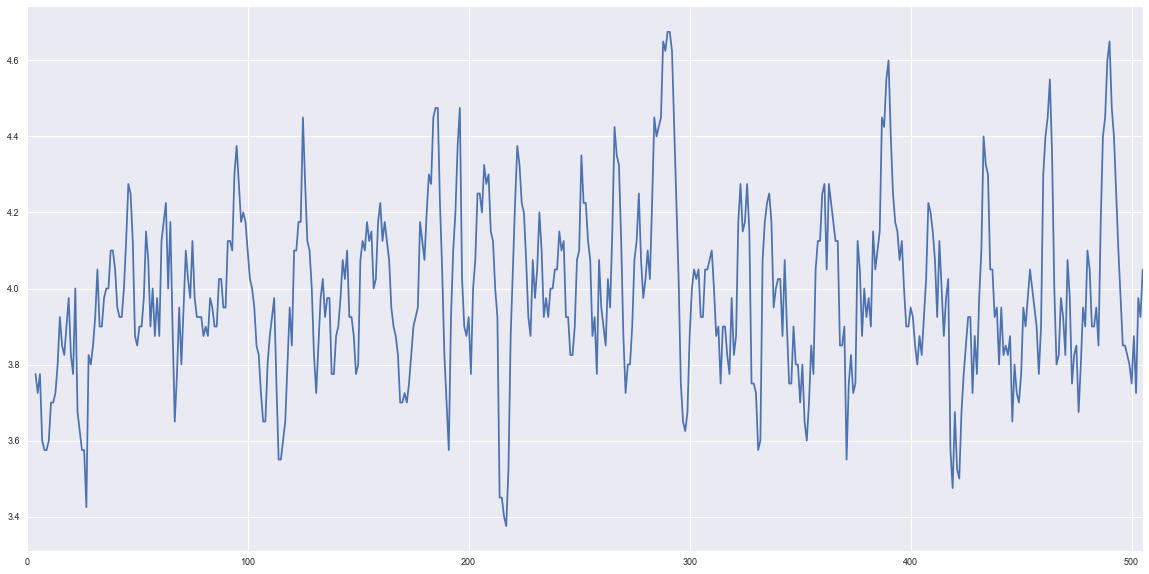

In [109]:
(df['op_deck_elixir'].rolling(window = 5)
     .mean()
     .plot(figsize=(20, 10)))

### Median deck elixir cost by arena

In [21]:
df[['op_deck_elixir', 'arena']].groupby(['arena']).median()

,op_deck_elixir
arena,
1,3.6875
2,4.0000
3,4.0000
4,3.8750
5,4.0000
6,4.0000
7,3.9375
8,4.0000


### Opponents' elixir based on my battle result

In [22]:
df[df.my_result == 'Victory']['op_deck_elixir'].describe()

count    243.000000
mean       3.950103
std        0.488258
min        2.125000
25%        3.625000
50%        4.000000
75%        4.250000
max        5.375000
Name: op_deck_elixir, dtype: float64

In [23]:
df[df.my_result == 'Defeat']['op_deck_elixir'].describe()

count    233.000000
mean       4.040236
std        0.439869
min        3.000000
25%        3.750000
50%        4.000000
75%        4.375000
max        5.750000
Name: op_deck_elixir, dtype: float64

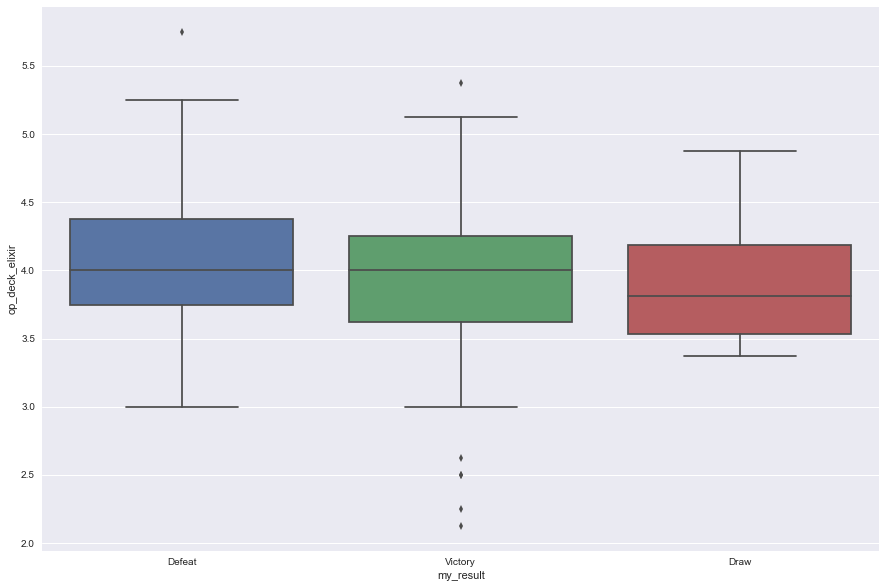

In [24]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(x=df['my_result'], y=df['op_deck_elixir'])

## Exploring arenas

#### Number of battles played in each arena

In [25]:
df.groupby(['arena'])['points'].count()

arena
1     22
2     22
3     39
4     83
5     75
6    152
7     28
8     85
Name: points, dtype: int64

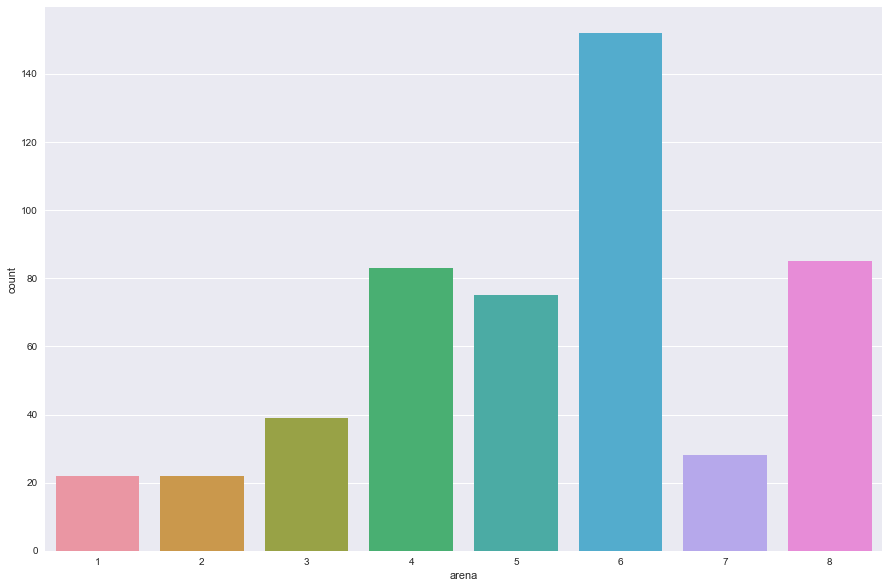

In [26]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.countplot(x = df['arena'])

#### Stats by arena

In [27]:
def op_cards_median_level(battles_by_result):
    return np.mean(list(filter(lambda x: x != 0, [y for x in battles_by_result.filter(regex=('op_[A-Z]')).values.tolist() for y in x] )) )


def top_op_cards(n, battles_by_result):
    aux_cards_dict = {}

    aux_filtered_df = battles_by_result.filter(regex=('op_[A-Z]'))
    
    for row in aux_filtered_df.itertuples(index=False):
        for col in row._fields:        
            if not col.startswith('_'):
                if getattr(row, col) > 0:
                    if col in aux_cards_dict:
                        aux_cards_dict[col] = aux_cards_dict[col] + 1
                    else:
                        aux_cards_dict[col] = 1

    return pd.DataFrame(data=sorted(aux_cards_dict.items(), key=operator.itemgetter(1), reverse=True), columns=['Card', 'Times_Used']).head(n)    

~~~ Arena 8 stats ~~~
Total battles in arena 8: 85
-------
my_result
Defeat     39
Draw       12
Victory    34
Name: arena, dtype: int64


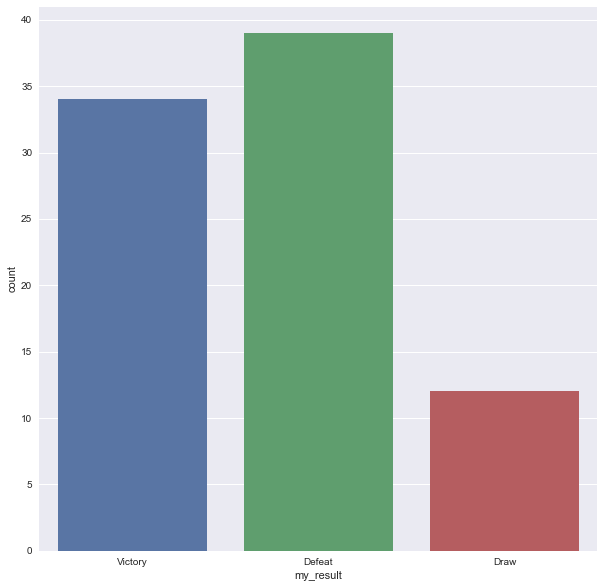

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           1.0        2.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       1.0       2.0         2.0       2.0       3.5

Opponents' cards median level
4.54411764706

Top 20 opponents' cards
                Card  Times_Used
0          op_Wizard          21
1   op_Skeleton_Army          20
2           op_Witch          16
3             op_Zap          12
4    op_Minion_Horde          11
5        op_Valkyrie          10
6       op_Hog_Rider          10
7            op_Rage          10
8     op_Baby_Dragon          10
9        op_Fireball           9
10         op_Prince           8
11        op_Minions           7
12         op_Arrows           7
13         op_Mirror           7
14      op_Musketeer           6
15  op_Goblin_Barrel           6
16        op_Tornado           

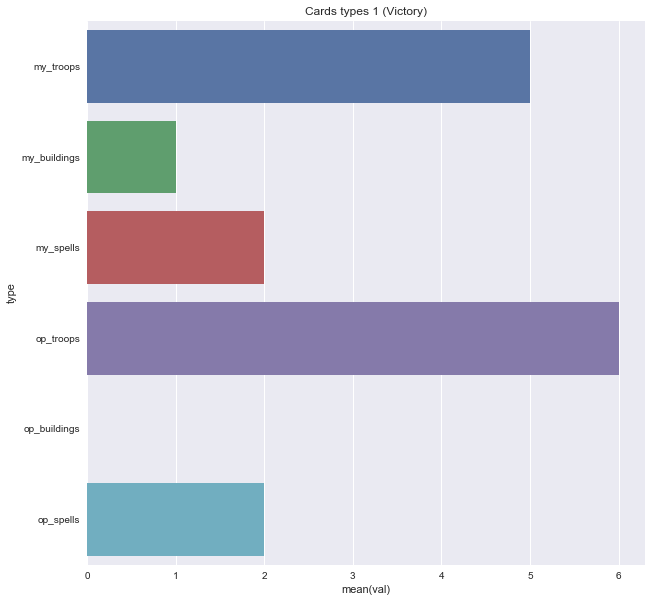

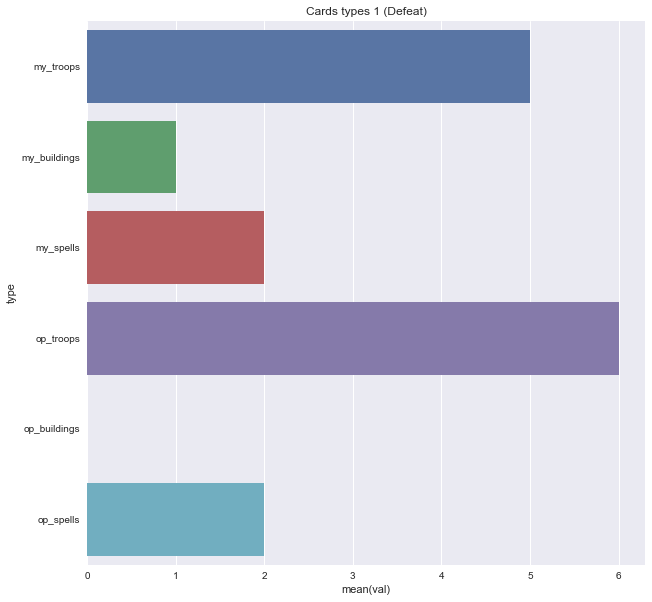

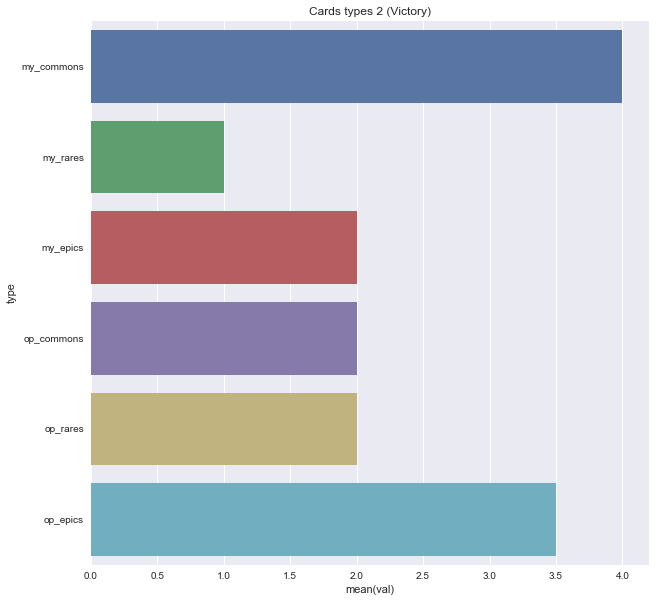

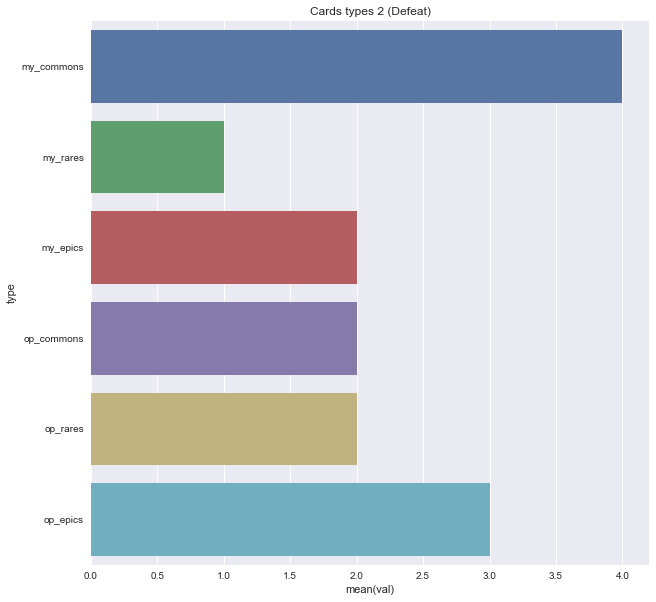

------------------------------------------------

~~~ Arena 7 stats ~~~
Total battles in arena 7: 28
-------
my_result
Defeat      6
Draw        3
Victory    19
Name: arena, dtype: int64


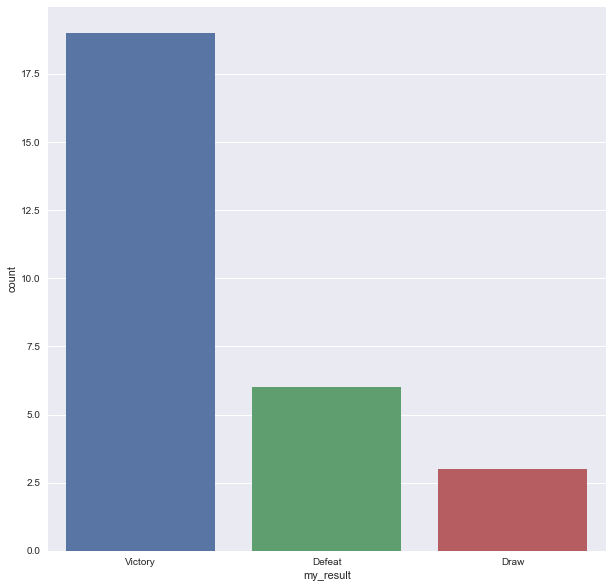

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           1.0        2.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       1.0       2.0         2.0       2.0       3.0

Opponents' cards median level
4.23026315789

Top 20 opponents' cards
                   Card  Times_Used
0      op_Skeleton_Army          15
1             op_Wizard          11
2       op_Minion_Horde          10
3           op_Valkyrie          10
4              op_Witch           8
5             op_Arrows           7
6        op_Baby_Dragon           7
7            op_Balloon           7
8      op_Goblin_Barrel           7
9           op_Fireball           6
10            op_Prince           6
11           op_Tornado           5
12         op_Hog_Rider           4
13         op_Musketeer           4
14              op_Rage           4
15              

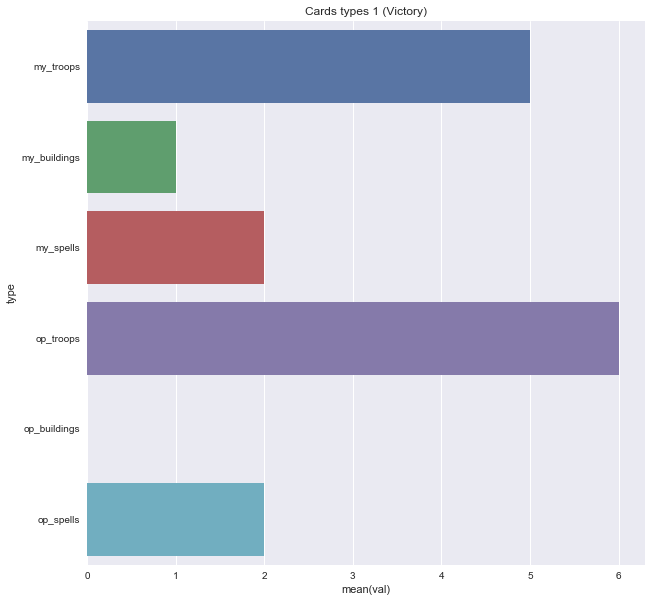

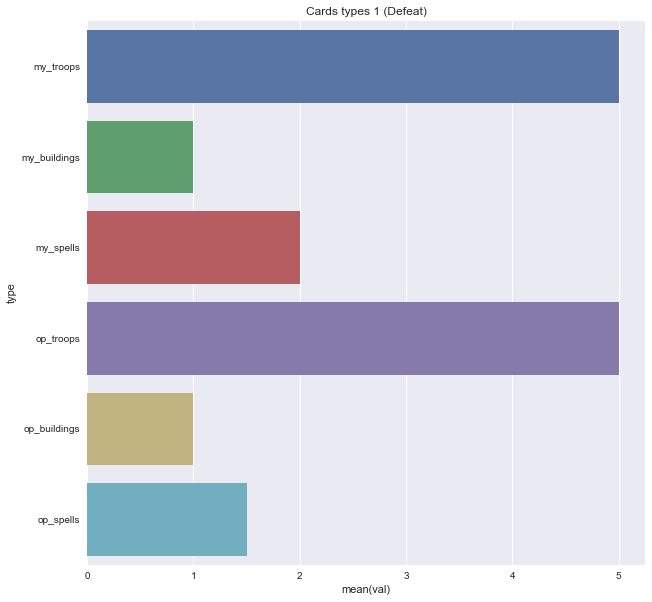

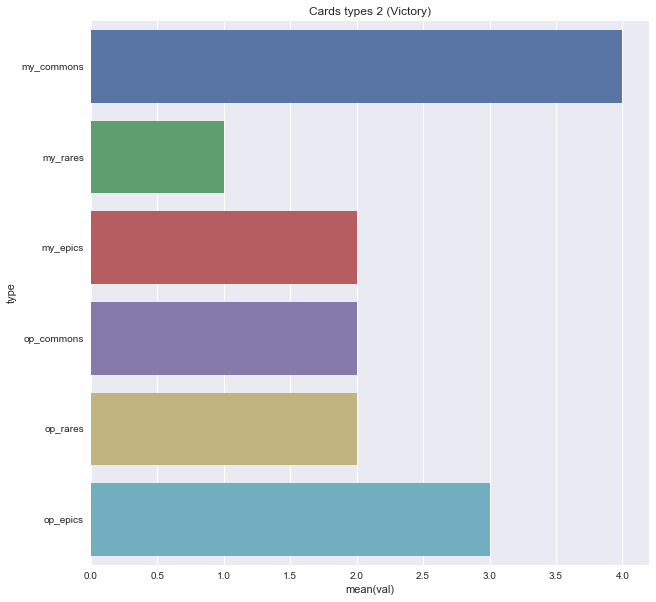

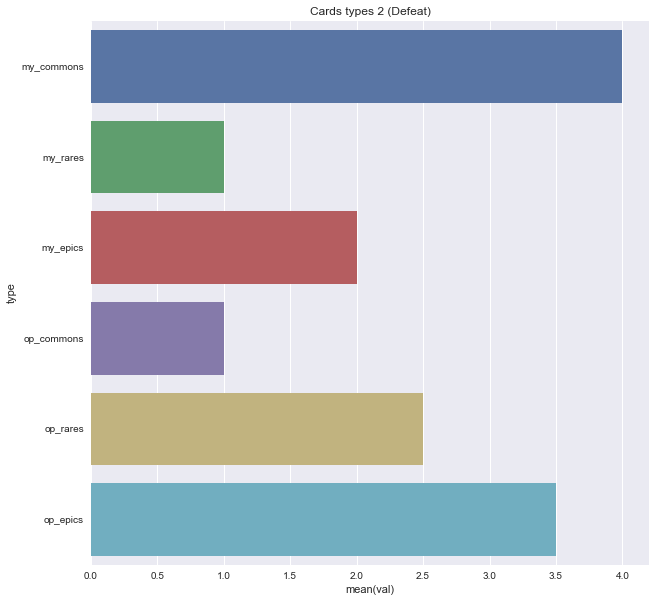

------------------------------------------------

~~~ Arena 6 stats ~~~
Total battles in arena 6: 152
-------
my_result
Defeat     79
Draw        8
Victory    65
Name: arena, dtype: int64


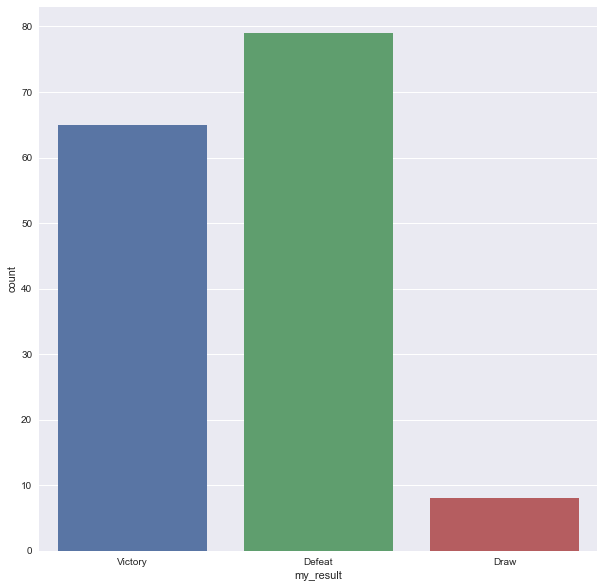

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        4.0           1.0        3.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         3.0       2.0       3.0         1.0       2.0       4.0

Opponents' cards median level
3.78076923077

Top 20 opponents' cards
                 Card  Times_Used
0    op_Skeleton_Army          48
1           op_Wizard          33
2            op_Witch          29
3           op_Prince          28
4         op_Valkyrie          25
5      op_Baby_Dragon          25
6     op_Minion_Horde          24
7           op_Arrows          23
8          op_Balloon          21
9           op_Mirror          18
10       op_Musketeer          16
11   op_Goblin_Barrel          16
12       op_Hog_Rider          14
13  op_Giant_Skeleton          13
14             op_Zap          13
15            op_Rage          11
16        op_F

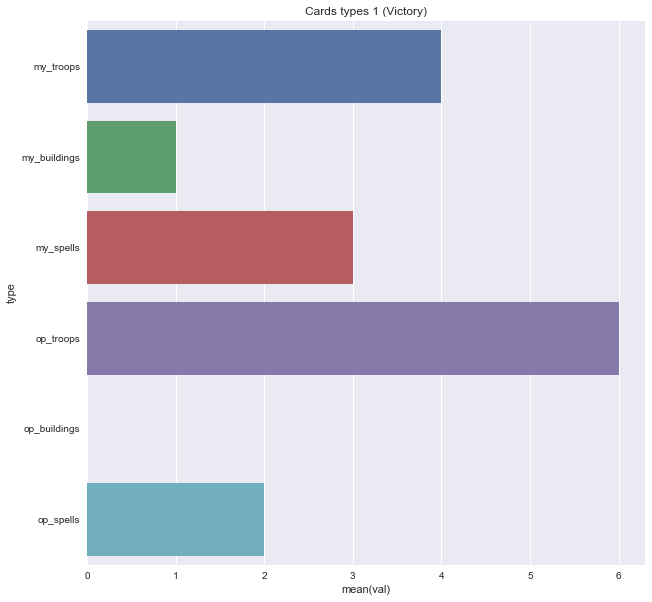

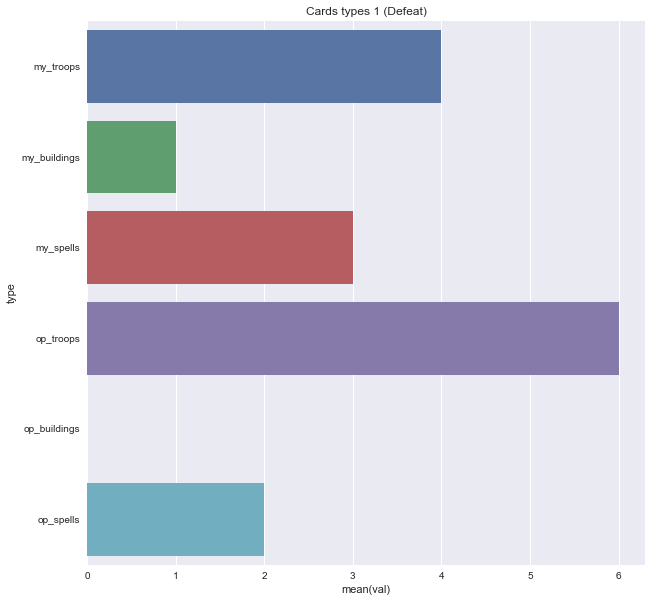

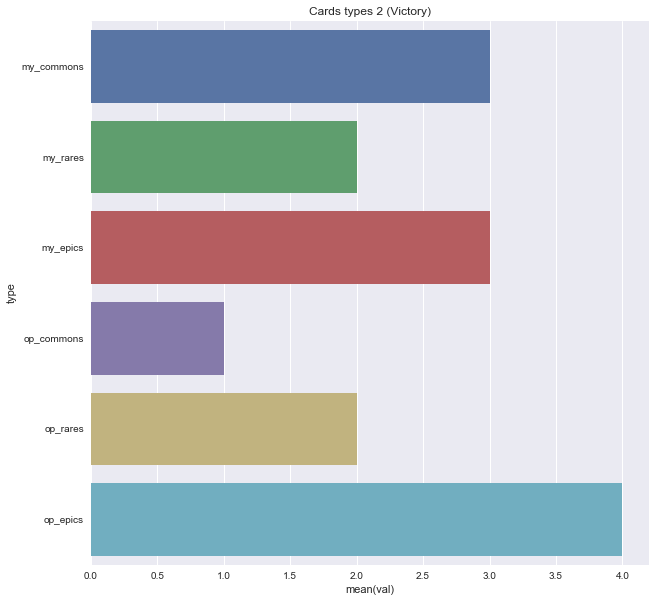

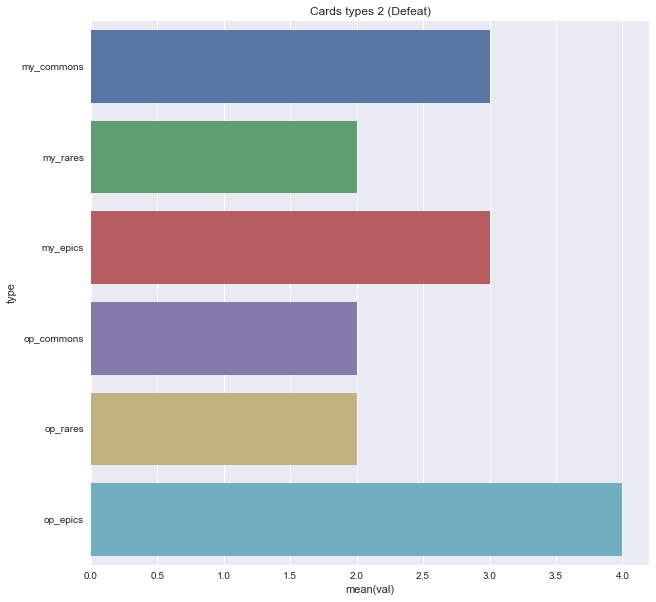

------------------------------------------------

~~~ Arena 5 stats ~~~
Total battles in arena 5: 75
-------
my_result
Defeat     34
Draw        4
Victory    37
Name: arena, dtype: int64


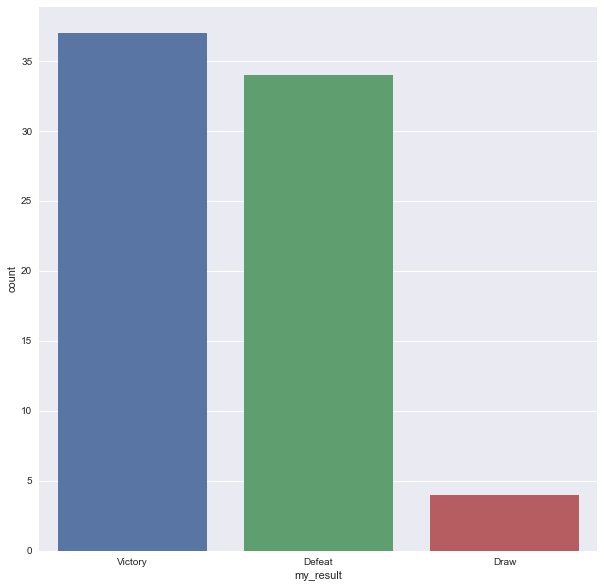

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           1.0        2.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       1.0       3.0         2.0       2.0       4.0

Opponents' cards median level
3.34459459459

Top 20 opponents' cards
                Card  Times_Used
0   op_Skeleton_Army          30
1     op_Baby_Dragon          25
2           op_Witch          21
3          op_Prince          17
4    op_Minion_Horde          17
5          op_Wizard          14
6       op_Musketeer          13
7   op_Goblin_Barrel          13
8        op_Valkyrie          12
9   op_Spear_Goblins          10
10       op_Fireball           9
11         op_Arrows           8
12        op_Balloon           8
13      op_Hog_Rider           7
14     op_Goblin_Hut           7
15           op_Rage           7
16          op_Giant           

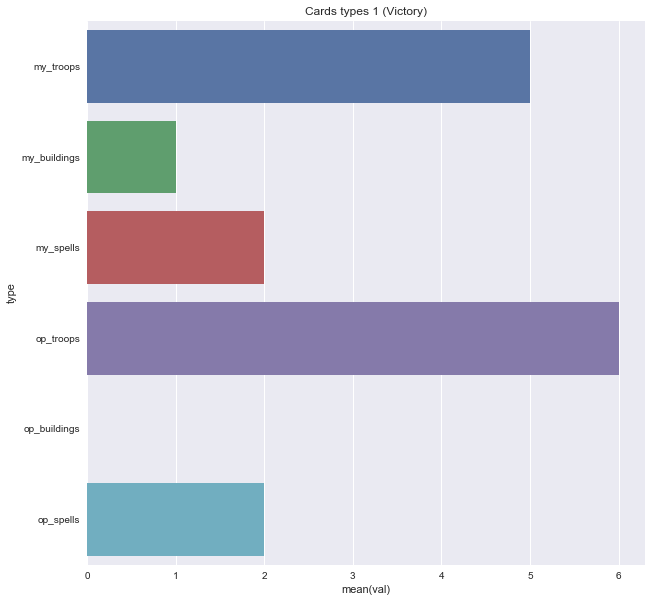

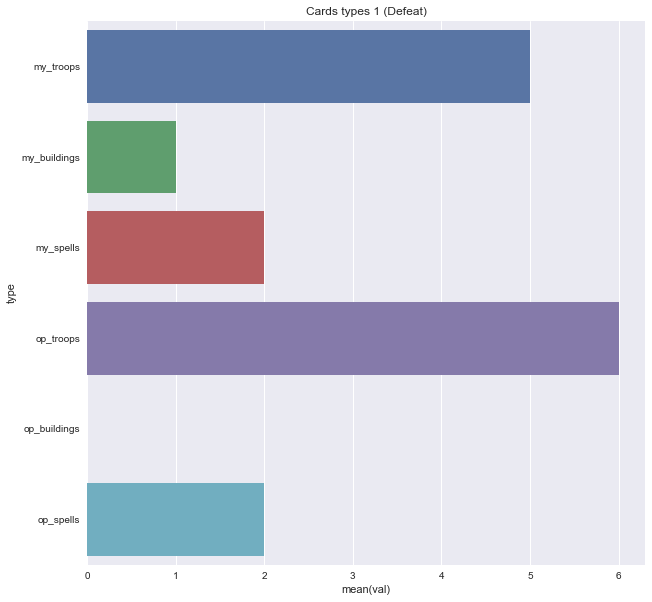

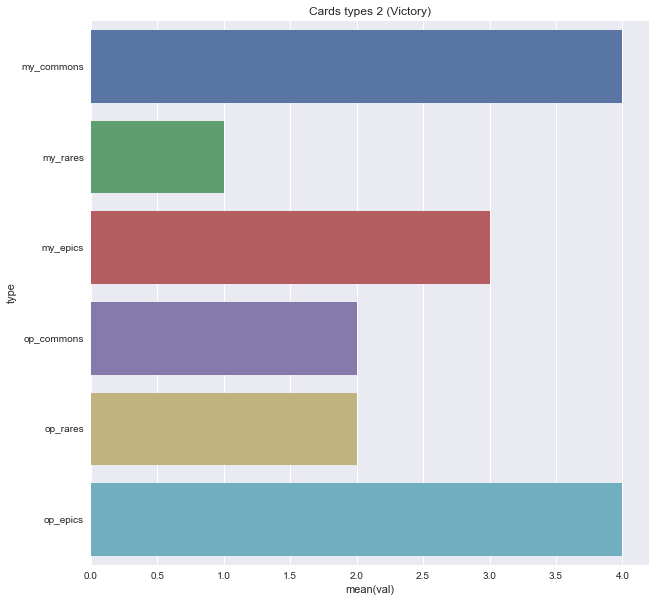

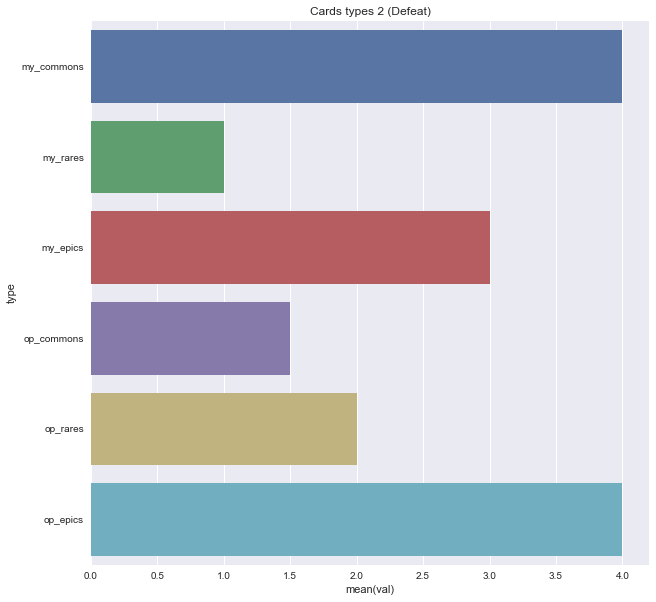

------------------------------------------------

~~~ Arena 4 stats ~~~
Total battles in arena 4: 83
-------
my_result
Defeat     44
Draw        2
Victory    37
Name: arena, dtype: int64


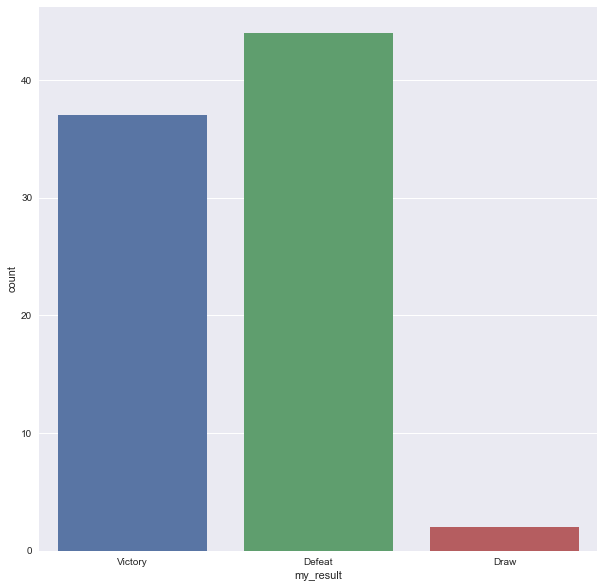

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         3.0       2.0       3.0         2.0       2.0       4.0

Opponents' cards median level
2.85810810811

Top 20 opponents' cards
                 Card  Times_Used
0    op_Skeleton_Army          28
1      op_Baby_Dragon          23
2           op_Prince          22
3           op_Arrows          19
4            op_Witch          18
5    op_Goblin_Barrel          16
6         op_Valkyrie          14
7        op_Musketeer          13
8         op_Fireball          13
9           op_Bomber          11
10    op_Minion_Horde          10
11          op_Knight           9
12         op_Balloon           9
13           op_Giant           8
14         op_Minions           7
15       op_Hog_Rider           6
16  op_Giant_S

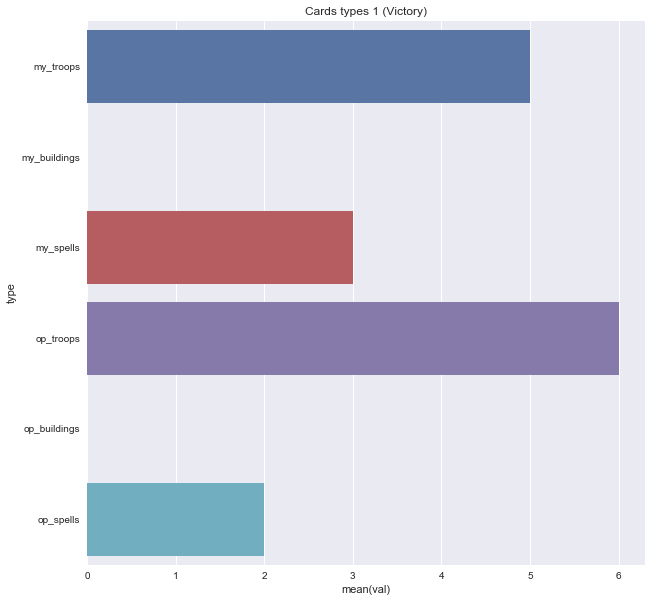

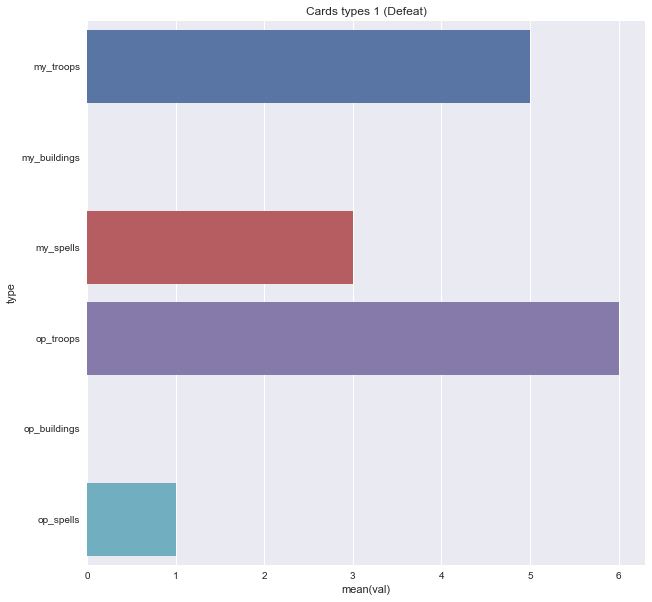

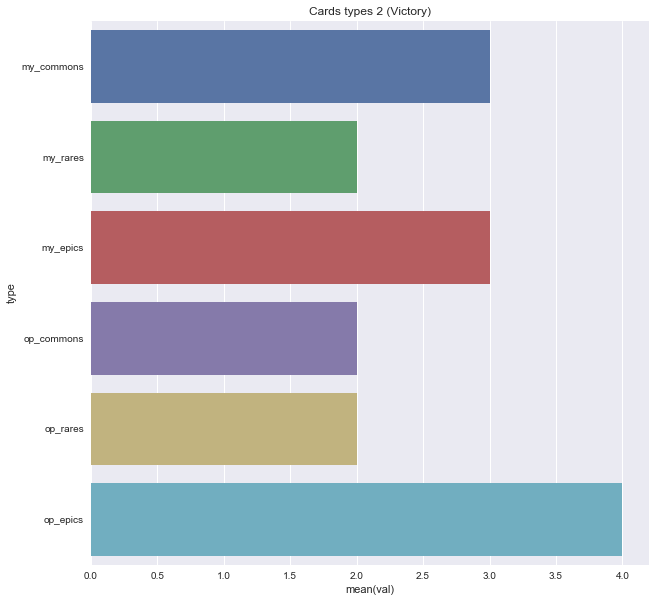

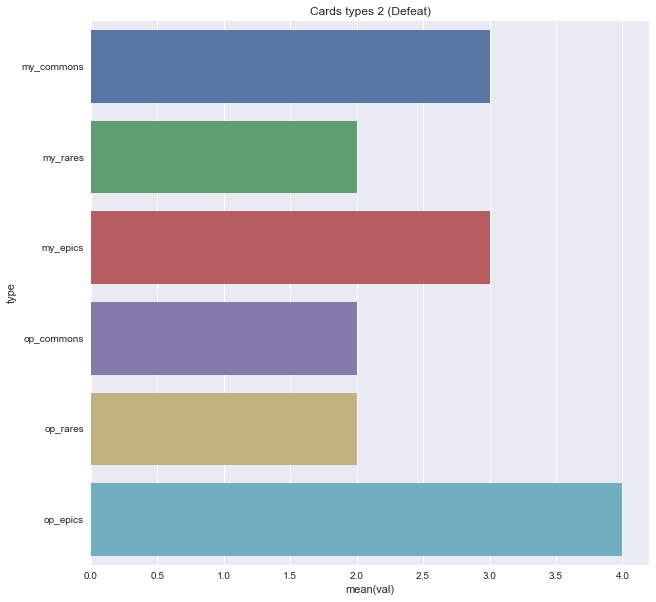

------------------------------------------------

~~~ Arena 3 stats ~~~
Total battles in arena 3: 39
-------
my_result
Defeat     16
Draw        1
Victory    22
Name: arena, dtype: int64


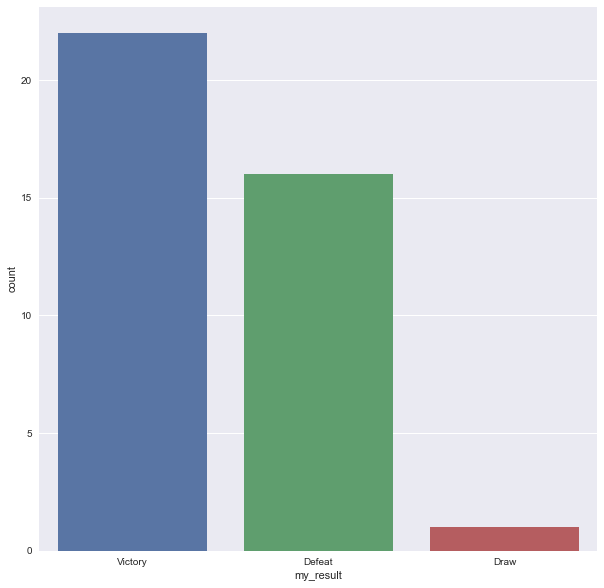

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           1.0        1.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         3.0       3.0       2.0         2.0       3.0       3.5

Opponents' cards median level
2.44886363636

Top 20 opponents' cards
                 Card  Times_Used
0      op_Baby_Dragon          14
1    op_Skeleton_Army          12
2         op_Fireball          12
3            op_Witch          12
4         op_Valkyrie          12
5           op_Prince          11
6        op_Musketeer           9
7           op_Knight           9
8            op_Giant           8
9    op_Spear_Goblins           8
10          op_Arrows           6
11          op_Bomber           6
12         op_Minions           5
13      op_Goblin_Hut           5
14         op_Archers           4
15          op_Rocket           4
16       op_Li

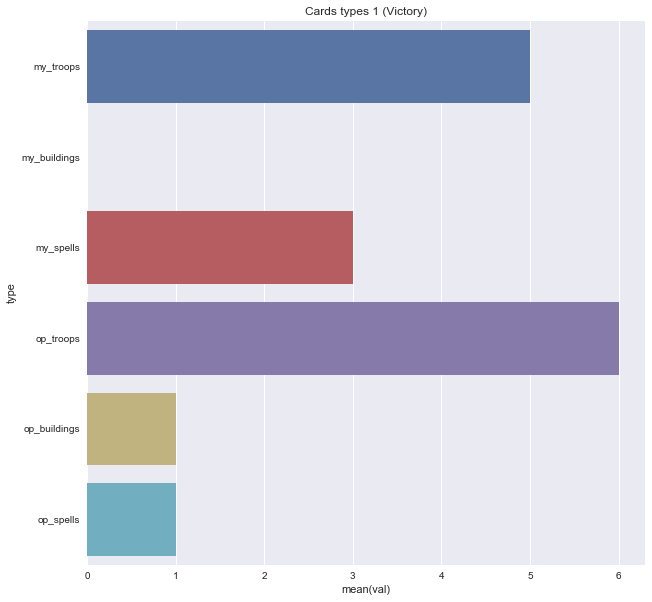

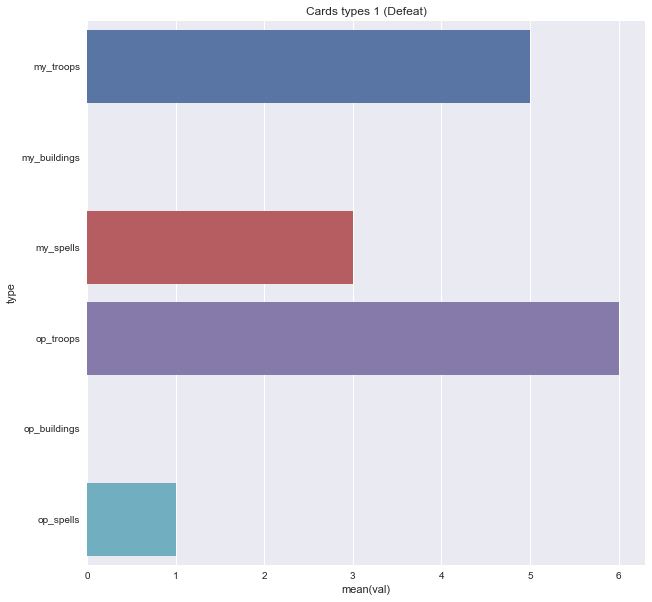

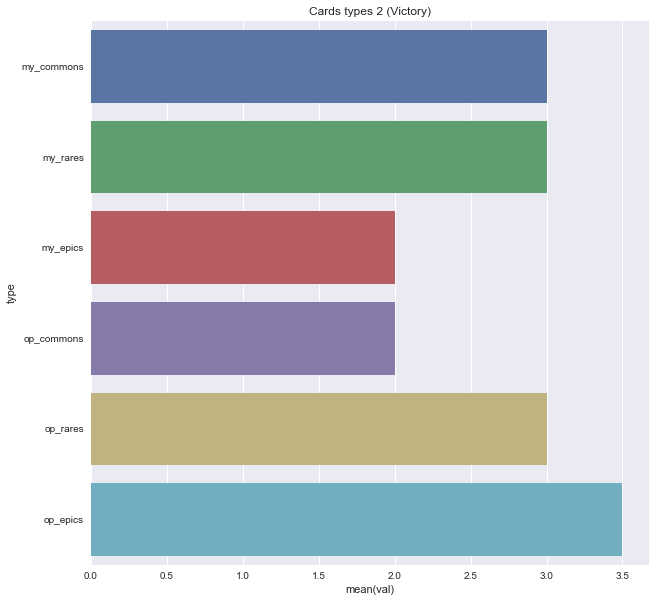

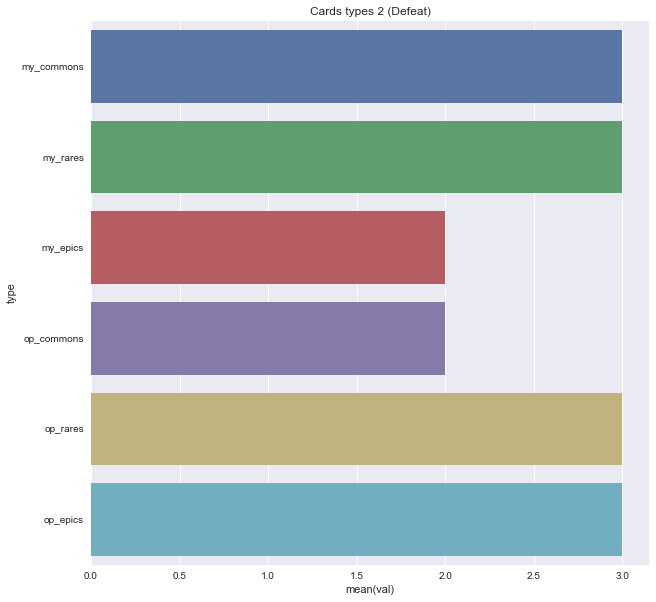

------------------------------------------------

~~~ Arena 2 stats ~~~
Total battles in arena 2: 22
-------
my_result
Defeat      7
Victory    15
Name: arena, dtype: int64


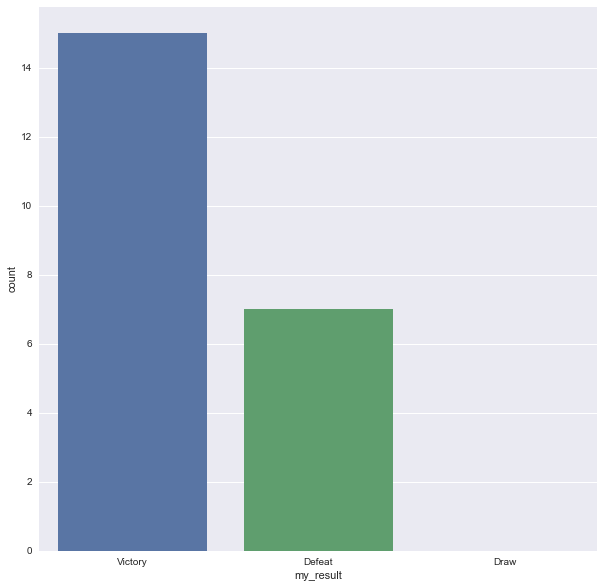

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           0.0        1.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       2.0       2.0         2.0       3.0       3.0

Opponents' cards median level
2.4

Top 20 opponents' cards
                Card  Times_Used
0   op_Skeleton_Army           9
1           op_Witch           9
2          op_Prince           9
3       op_Musketeer           8
4     op_Baby_Dragon           8
5           op_Giant           7
6        op_Valkyrie           7
7        op_Fireball           6
8   op_Spear_Goblins           6
9         op_Archers           6
10  op_Goblin_Barrel           6
11      op_Lightning           5
12        op_Minions           4
13         op_Knight           4
14      op_Skeletons           3
15         op_Arrows           3
16     op_Bomb_Tower           3
17      

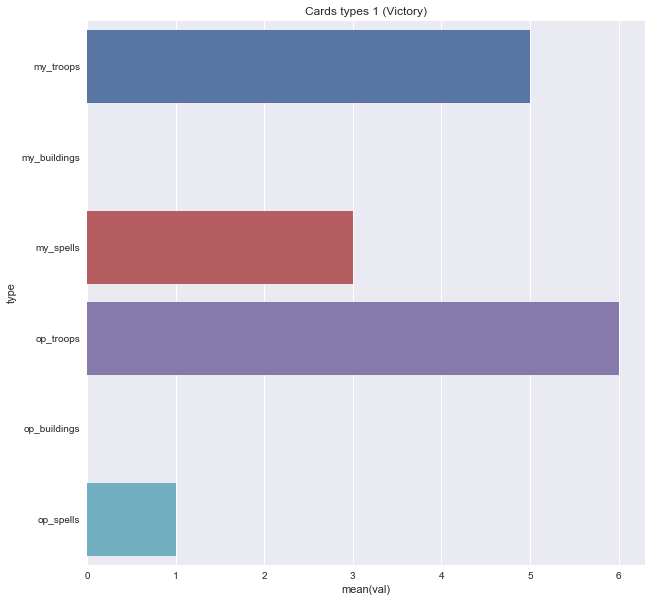

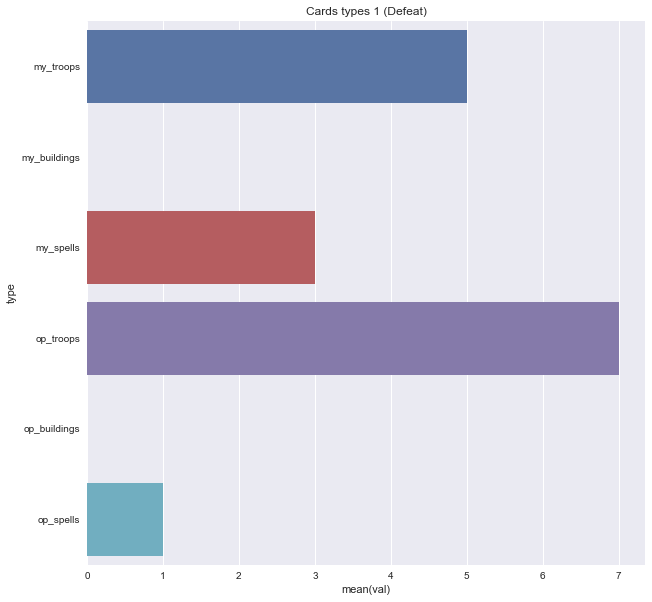

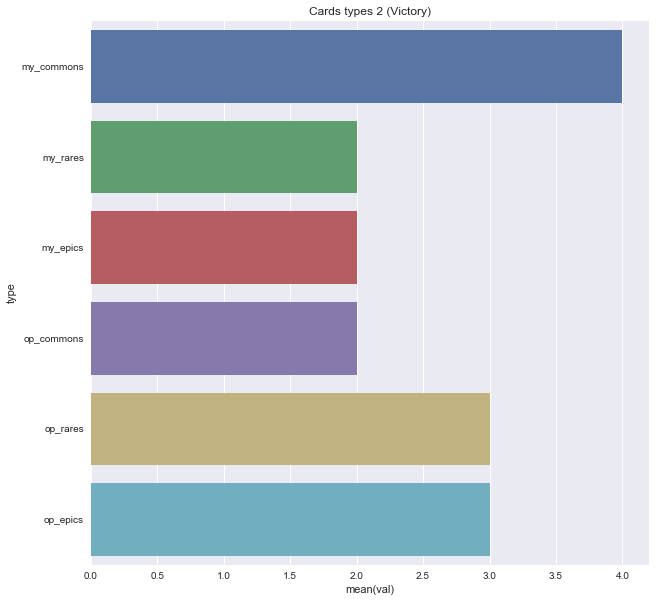

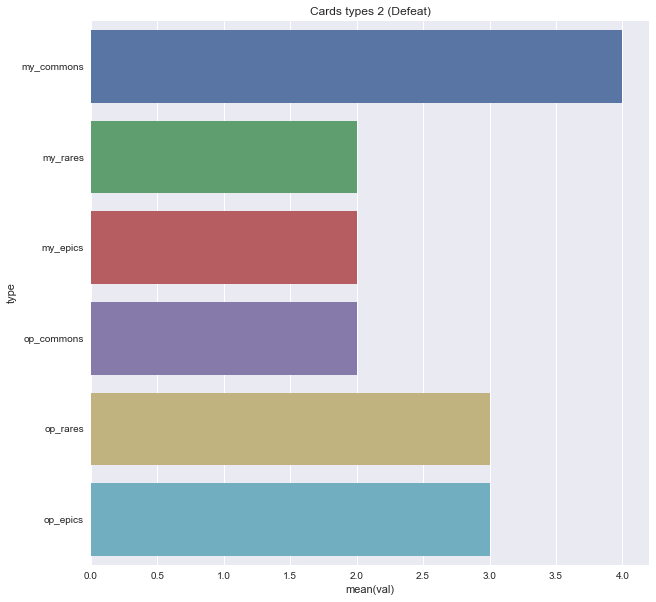

------------------------------------------------

~~~ Arena 1 stats ~~~
Total battles in arena 1: 22
-------
my_result
Defeat      8
Victory    14
Name: arena, dtype: int64


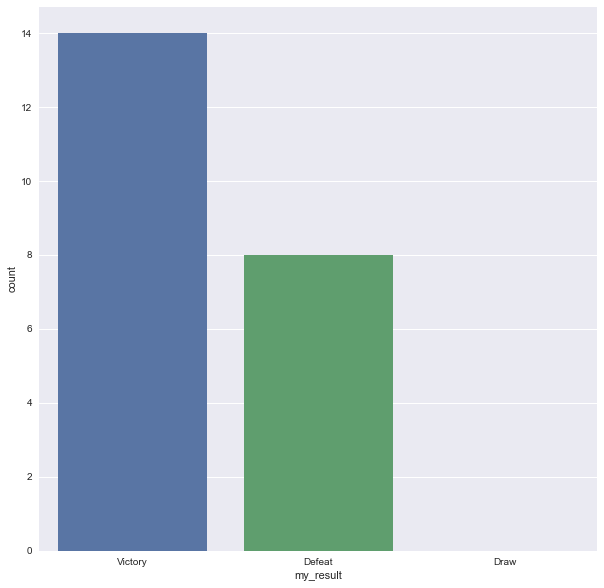

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       3.0       2.0         3.5       3.0       1.0

Opponents' cards median level
2.0

Top 20 opponents' cards
                Card  Times_Used
0           op_Giant          13
1        op_Fireball          13
2          op_Knight          11
3          op_Arrows          10
4     op_Baby_Dragon           8
5         op_Archers           8
6          op_Bomber           8
7       op_Musketeer           7
8        op_Valkyrie           6
9           op_Witch           5
10  op_Spear_Goblins           4
11  op_Skeleton_Army           4
12      op_Lightning           3
13     op_Goblin_Hut           3
14        op_Goblins           3
15         op_Prince           1

--- Defeats ---
Cards types count (media

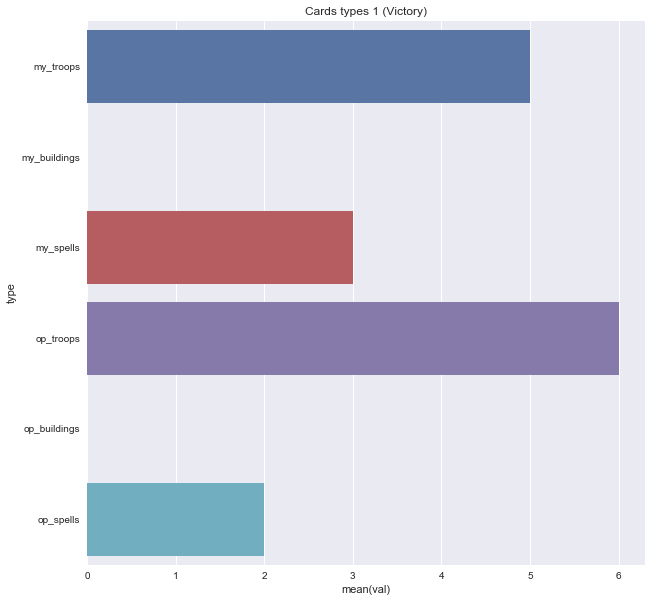

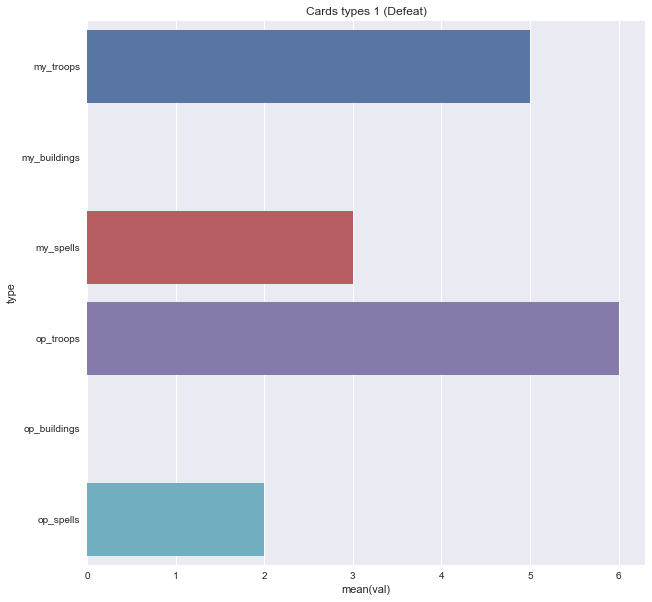

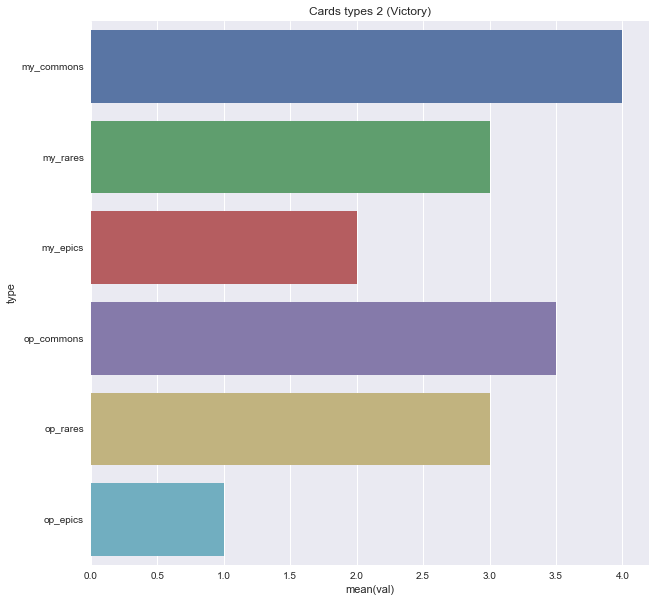

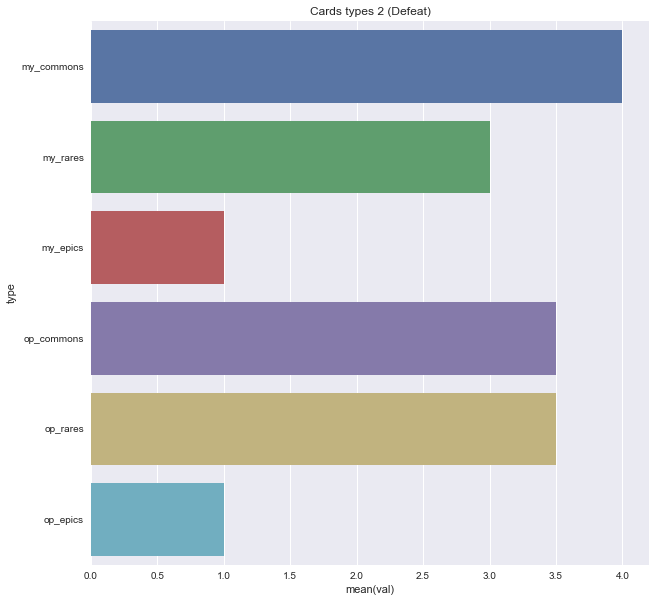

------------------------------------------------



In [28]:
for i in reversed(range(1, 9)):
    print('~~~ Arena %d stats ~~~' % i)
    
    battles_in_arena = df[df.arena == str(i)]
    print('Total battles in arena %d: %d' % (i, battles_in_arena.shape[0]))
    print('-------')
    print(battles_in_arena.groupby(['my_result'])['arena'].count())
    
    sns.set(rc={'figure.figsize':(10, 10)})
    sns.countplot(x=battles_in_arena['my_result'], order=['Victory', 'Defeat', 'Draw'])
    plt.show()    
    
    print('--- Victories ---')
    
    battles_by_vic = battles_in_arena[battles_in_arena.my_result == 'Victory']
    
    print('Cards types count (median)')
    
    cards_types1_vic = (battles_by_vic[['my_troops', 'my_buildings', 'my_spells', 
                                       'op_troops', 'op_buildings', 'op_spells']]
                       .describe())
    
    print(cards_types1_vic.loc[['50%']])
    
    print('----')
    
    cards_types2_vic = (battles_by_vic[['my_commons', 'my_rares', 'my_epics', 
                                        'op_commons', 'op_rares', 'op_epics']]
                       .describe())    
    
    print(cards_types2_vic.loc[['50%']])
    
    
    print('\nOpponents\' cards median level')
    
    print( op_cards_median_level(battles_by_vic) )    
    
    print('\nTop 20 opponents\' cards')

    print(top_op_cards(20, battles_by_vic))
    
    
    print('\n--- Defeats ---')
    
    battles_by_def = battles_in_arena[battles_in_arena.my_result == 'Defeat']
    
    print('Cards types count (median)')
    
    cards_types1_def = (battles_by_def[['my_troops', 'my_buildings', 'my_spells', 
                                       'op_troops', 'op_buildings', 'op_spells']]
                       .describe())    
    
    print(cards_types1_def.loc[['50%']])        
    
    print('----')
    
    cards_types2_def = (battles_by_def[['my_commons', 'my_rares', 'my_epics', 
                                        'op_commons', 'op_rares', 'op_epics']]
                       .describe())       
    
    print(cards_types2_def.loc[['50%']])
    
    
    print('\nOpponents\' cards median level')
    
    print( op_cards_median_level(battles_by_def) )    
    
    print('\nTop 20 opponents\' cards')
    
    print(top_op_cards(20, battles_by_def))
    
    print('----')
    
    sns.set(rc={'figure.figsize':(10, 10)})
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types1_vic.columns,
                                                             'val': (cards_types1_vic.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 1 (Victory)')   
    plt.show()

    sns.set(rc={'figure.figsize':(10, 10)})
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types1_def.columns,
                                                             'val': (cards_types1_def.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 1 (Defeat)')   
    plt.show()

    sns.set(rc={'figure.figsize':(10, 10)})
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types2_vic.columns,
                                                             'val': (cards_types2_vic.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 2 (Victory)')   
    plt.show()    

    sns.set(rc={'figure.figsize':(10, 10)})
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types2_def.columns,
                                                             'val': (cards_types2_def.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 2 (Defeat)')   
    plt.show()  


    
    
    print('------------------------------------------------\n')